# Concept

Gaussian Mixture Models are a statistical technique used for approximating the probability distribution of data, known as [**density estimation**](https://en.wikipedia.org/wiki/Density_estimation#:~:text=In%20statistics%2C%20probability%20density%20estimation,unobservable%20underlying%20probability%20density%20function.). 

From the introduction in [the previous section](../intro.md), one might ask the motivation of using a linear combination to approximate a probability distribution. The answer is that the linear combination of simple distributions is a flexible model that can approximate a wide variety of probability distributions.

Consider your dataset that exhibits a multimodal distribution (i.e. multiple modes), then a single Gaussian distribution will not be able to capture the distribution of the data.

In [3]:
import sys
from pathlib import Path

parent_dir = str(Path().resolve().parents[3])
print(parent_dir)
sys.path.append(parent_dir)

from typing import Any, Dict, Tuple

import cv2
from scipy.stats import bernoulli, binom, norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from rich.pretty import pprint

from src.utils.plot import use_svg_display

use_svg_display()

/Users/gaohn/gao/gaohn-galaxy


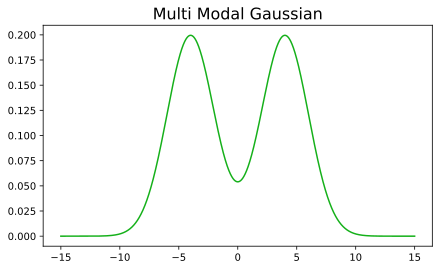

In [4]:
x_axis = np.arange(-15, 15, 0.001)

fig = plt.figure(figsize=(7,4))
plt.plot(x_axis, norm.pdf(x_axis, -4, 2) + norm.pdf(x_axis, 4, 2), c=sns.xkcd_rgb["green"])

plt.title("Multi Modal Gaussian", fontsize=16)
plt.show()

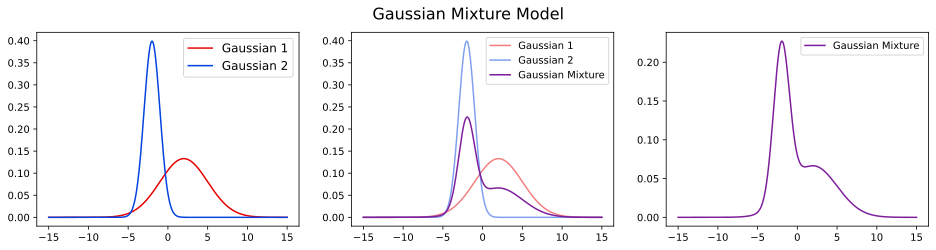

In [5]:
x_axis = np.arange(-15, 15, 0.001)
mu = {
    "1": 2,
    "2": -2
}
sigma = {
    "1": 3,
    "2": 1
}
weights = {
    "1": 0.5,
    "2": 0.5
}

gaussian_1 = norm.pdf(x_axis, mu["1"], sigma["1"])
gaussian_2 = norm.pdf(x_axis, mu["2"], sigma["2"])

fig = plt.figure(figsize=(16,3.5))

plt.subplot(1, 3, 1)
plt.plot(x_axis, gaussian_1, c=sns.xkcd_rgb["red"])
plt.plot(x_axis, gaussian_2, c=sns.xkcd_rgb["blue"])
plt.legend(["Gaussian 1", "Gaussian 2"], fontsize=12)

plt.subplot(1, 3, 2)
plt.plot(x_axis, gaussian_1, c=sns.xkcd_rgb["red"], alpha=0.5)
plt.plot(x_axis, gaussian_2, c=sns.xkcd_rgb["blue"], alpha=0.5)
plt.plot(x_axis, gaussian_1*weights["1"] + gaussian_2*weights["2"], c=sns.xkcd_rgb["purple"])
plt.legend(["Gaussian 1", "Gaussian 2", "Gaussian Mixture"], fontsize=10)

plt.subplot(1, 3, 3)
plt.plot(x_axis, gaussian_1*weights["1"] + gaussian_2*weights["2"], c=sns.xkcd_rgb["purple"])
plt.legend(["Gaussian Mixture"], fontsize=10)

fig.suptitle('Gaussian Mixture Model', fontsize=16)

plt.show()

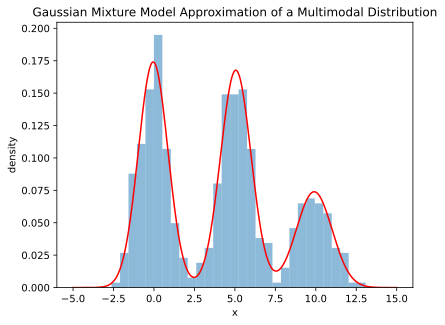

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate a synthetic dataset with three clusters
np.random.seed(42)
n_samples = 500
X = np.concatenate([np.random.normal(0, 1, int(0.4 * n_samples)),
                    np.random.normal(5, 1, int(0.4 * n_samples)),
                    np.random.normal(10, 1, int(0.2 * n_samples))]).reshape(-1, 1)

# Fit a Gaussian Mixture Model to the data
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Plot the data and the Gaussian Mixture Model
x_plot = np.linspace(-5, 15, 1000).reshape(-1, 1)
density = np.exp(gmm.score_samples(x_plot))
plt.hist(X, bins=30, density=True, alpha=0.5)
plt.plot(x_plot, density, '-r')
plt.xlabel('x')
plt.ylabel('density')
plt.title('Gaussian Mixture Model Approximation of a Multimodal Distribution')
plt.show()
